In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
import math

In [2]:
iris=load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [3]:
features=pd.DataFrame(iris.data,columns=iris.feature_names)
features

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [4]:
target=pd.DataFrame(iris.target,columns=['Target'])
target

,Target
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


Text(0.5, 0, 'features')

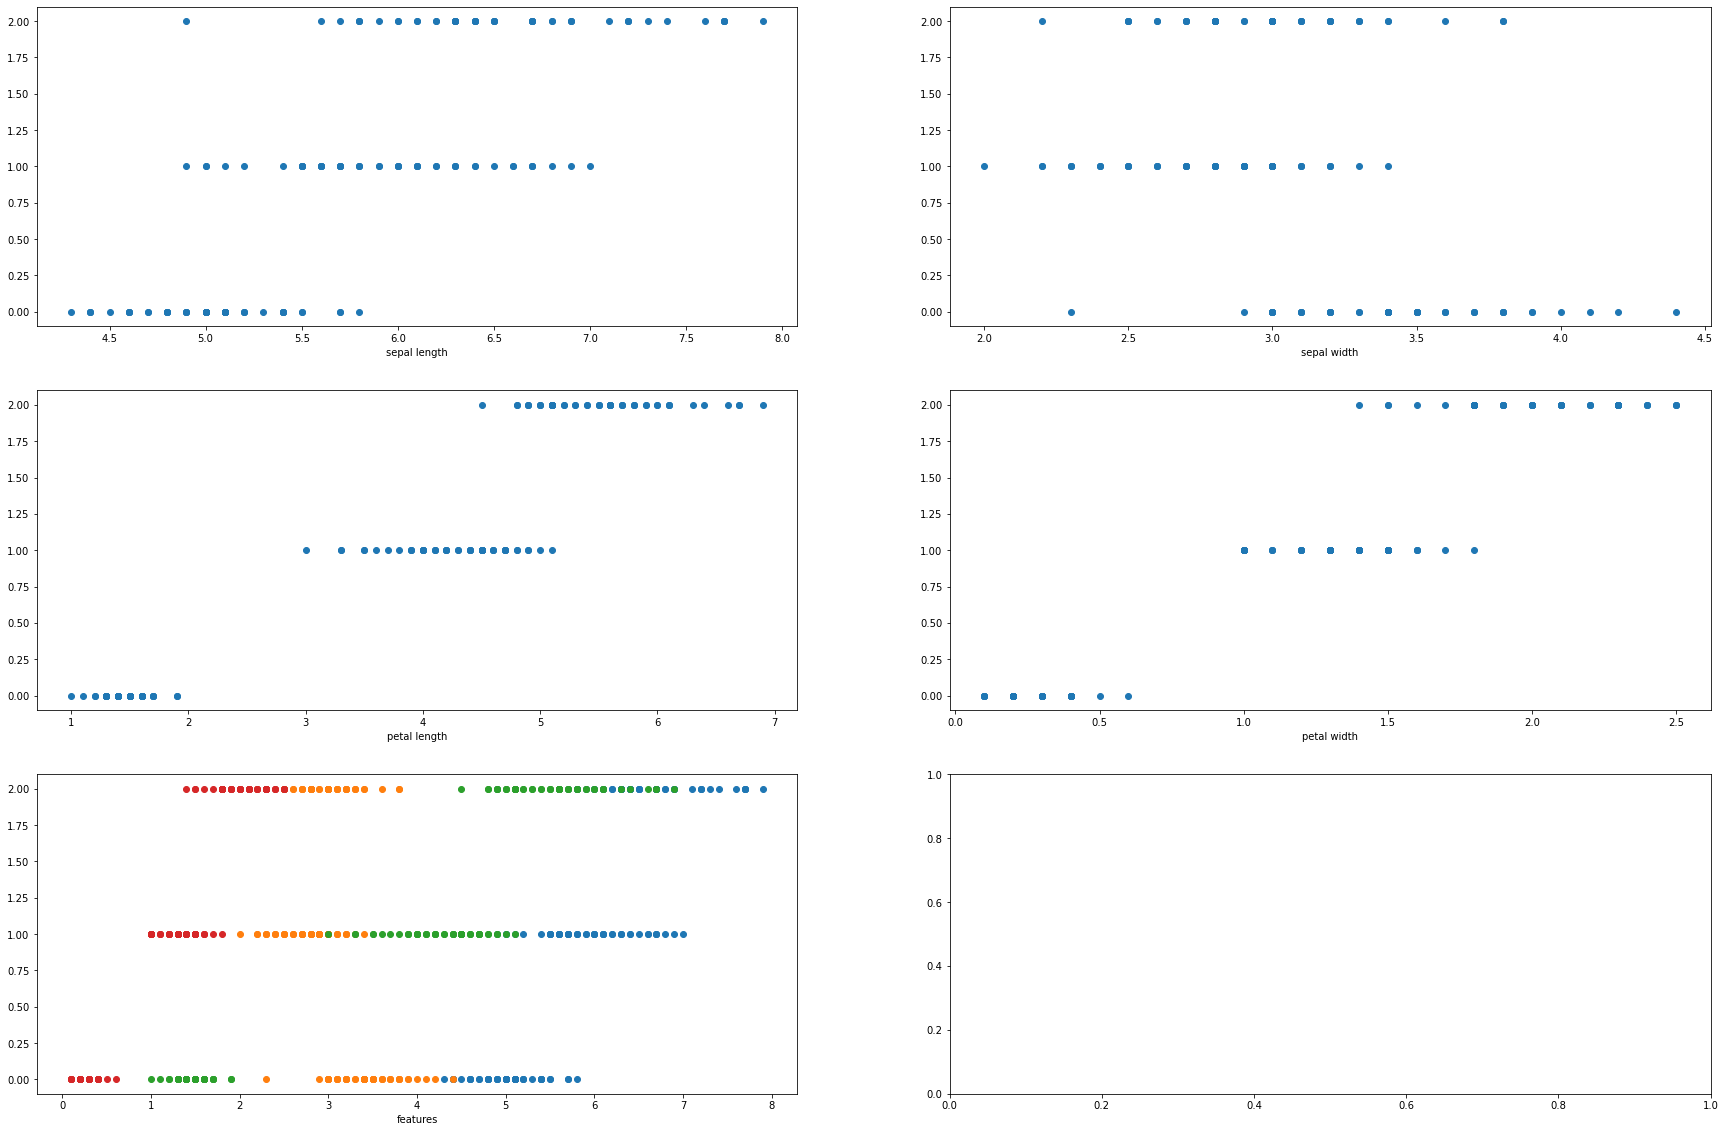

In [5]:
fig,ax=plt.subplots(3,2,figsize=(30,20))
ax[0][0].scatter(features['sepal length (cm)'],target)
ax[0][0].set_xlabel('sepal length')
ax[0][1].scatter(features['sepal width (cm)'],target)
ax[0][1].set_xlabel('sepal width')
ax[1][0].scatter(features['petal length (cm)'],target)
ax[1][0].set_xlabel('petal length')
ax[1][1].scatter(features['petal width (cm)'],target)
ax[1][1].set_xlabel('petal width')
ax[2][0].plot(features,target,'o')
ax[2][0].set_xlabel('features')

In [6]:
X=iris.data
Y=iris.target

In [7]:
df=pd.concat([features,target],axis=1)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [8]:
y = pd.Categorical.from_codes(iris.target, iris.target_names)
y = pd.get_dummies(y, drop_first=True)
y

,versicolor,virginica
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
145,0,1
146,0,1
147,0,1
148,0,1


In [9]:
df1=pd.concat([features,y],axis=1)
df1

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),versicolor,virginica
0,5.1,3.5,1.4,0.2,0,0
1,4.9,3.0,1.4,0.2,0,0
2,4.7,3.2,1.3,0.2,0,0
3,4.6,3.1,1.5,0.2,0,0
4,5.0,3.6,1.4,0.2,0,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0,1
146,6.3,2.5,5.0,1.9,0,1
147,6.5,3.0,5.2,2.0,0,1
148,6.2,3.4,5.4,2.3,0,1


In [11]:
xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=0.2,random_state=38)

In [12]:
def distance(x1,x2):
    dis=0
    for i in range(len(x1)):
        dis+=math.pow(x1[i]-x2[i],2)
    return math.sqrt(dis)    

In [13]:
def knn(xtrain,xtest,k,ytrain):
    dis=[]
    for i in range(len(xtrain)):
        dis.append([distance(xtrain[i],xtest),xtrain[i],ytrain[i]])
    dis.sort(key = lambda x: x[0])
    kn=[dis[i] for i in range(k)]
    seto,verso,virgin=0,0,0
    #print(kn)
    for i in kn:
        if(i[2]==0):
            seto+=1
        elif(i[2]==1):
            verso+=1
        else:
            virgin+=1
    maxx=max(seto,verso,virgin)
    if(maxx==seto):
        return 0
    elif(maxx==verso):
        return 1
    else:
        return 2

In [14]:
ypred=np.array([knn(xtrain,i,5,ytrain) for i in xtest])

KeyError: 0

In [ ]:
confusion_matrix(ypred,ytest)

In [15]:
mean_squared_error(ypred,ytest)

NameError: name 'ypred' is not defined

In [16]:
r2_score(ypred,ytest)

NameError: name 'ypred' is not defined

In [17]:
df2=pd.concat([pd.DataFrame(ypred,columns=['predicted']),pd.DataFrame(ytest,columns=['original'])],axis=1)
df2


NameError: name 'ypred' is not defined

In [23]:
knnn=KNeighborsClassifier()
model=knnn.fit(xtrain,ytrain)

In [24]:
ypred1=model.predict(xtest)

In [25]:
mean_squared_error(ypred1,ytest)

0.03333333333333333

In [26]:
confusion_matrix(ypred1,ytest)

ValueError: multilabel-indicator is not supported

In [27]:
df3=pd.concat([pd.DataFrame(ypred,columns=['predicted']),pd.DataFrame(ytest,columns=['original'])],axis=1)
df3

NameError: name 'ypred' is not defined